In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
import matplotlib.pyplot as plt

# Carrega o conjunto de dados MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Seleciona alguns dados
num_samples = 1000
X_samples = X[:num_samples]
y_samples = y[:num_samples]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Executa o algoritmo de clustering (K-Means)
#n_clusters = 100
#kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#kmeans.fit(X_samples)

In [ ]:
from sklearn.decomposition import PCA
pca_xd = PCA(n_components=0.95)
X_pca_xd = pca_xd.fit_transform(X_samples)

In [ ]:
# Executa o algoritmo de clustering (K-Means)
n_clusters = 20
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_samples)
#kmeans.fit(X_pca_xd)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=20, random_state=42)

In [ ]:
# Função para exibir uma imagem com os rótulos reais e fornecidos pelo usuário
def show_image_with_labels(image, true_label, user_label):
    plt.figure(figsize=(1, 1))
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Real: {true_label}, Fornecido: {user_label}")
    plt.axis('off')
    plt.show()

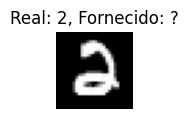

Qual o dígito (0-9)?
2


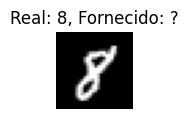

Qual o dígito (0-9)?
8


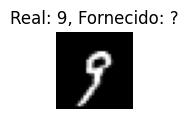

Qual o dígito (0-9)?
9


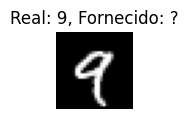

Qual o dígito (0-9)?
9


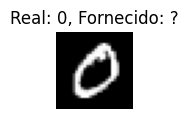

Qual o dígito (0-9)?
0


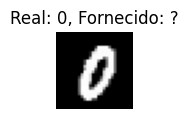

Qual o dígito (0-9)?
0


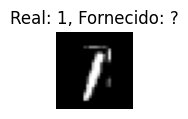

Qual o dígito (0-9)?
1


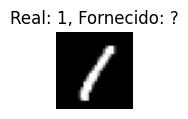

Qual o dígito (0-9)?
1


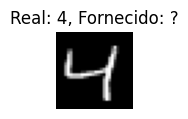

Qual o dígito (0-9)?
4


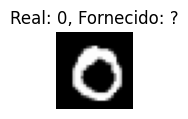

Qual o dígito (0-9)?
0


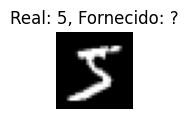

Qual o dígito (0-9)?
5


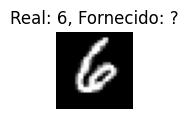

Qual o dígito (0-9)?
6


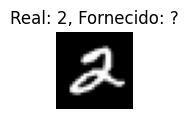

Qual o dígito (0-9)?
2


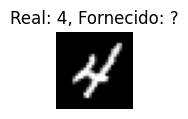

Qual o dígito (0-9)?
4


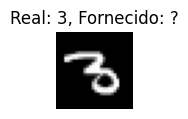

Qual o dígito (0-9)?
3


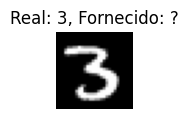

Qual o dígito (0-9)?
3


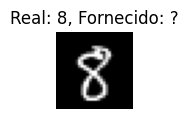

Qual o dígito (0-9)?
8


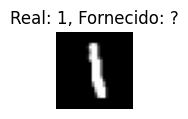

Qual o dígito (0-9)?
1


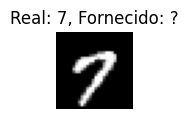

Qual o dígito (0-9)?
7


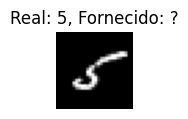

Qual o dígito (0-9)?
5


In [ ]:
# Solicita ao usuário os valores dos rótulos
# Inverter a transformação do PCA para obter as imagens originais
#X_restored = pca_xd.inverse_transform(X_pca_xd)

labels = []
for i in range(n_clusters):
    index = np.where(kmeans.labels_ == i)[0][0]
    image = X_samples[index]
    #image = X_restored[index]
    true_label = y[index]
    
    show_image_with_labels(image, true_label, "?")
    
    print(f"Qual o dígito (0-9)?")
    label = int(input())
    labels.append(label)

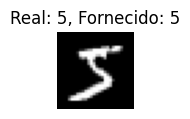

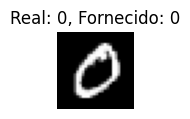

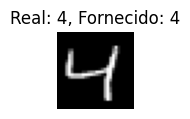

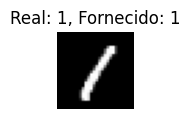

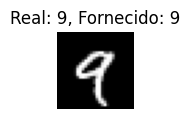

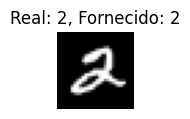

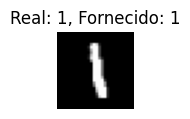

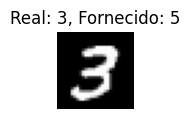

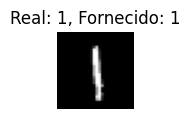

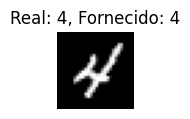

In [ ]:
# Propaga os rótulos para todos os dados do conjunto de dados
y_propagated = np.array([labels[label] for label in kmeans.labels_])

# Exibe as imagens com os rótulos reais e fornecidos pelo usuário
for i in range(10):
    true_label = y[i]
    propagated_label = y_propagated[i]
    show_image_with_labels(X_samples[i], true_label, propagated_label)
    #show_image_with_labels(X_restored[i], true_label, propagated_label)

In [ ]:
# Contagem de itens em cada cluster
item_count = np.bincount(kmeans.labels_)
for i in range(n_clusters):
    print(f"Cluster {labels[i]}: {item_count[i]} itens")

Cluster 2: 44 itens
Cluster 8: 63 itens
Cluster 9: 45 itens
Cluster 9: 78 itens
Cluster 0: 41 itens
Cluster 0: 42 itens
Cluster 1: 48 itens
Cluster 1: 53 itens
Cluster 4: 55 itens
Cluster 0: 43 itens
Cluster 5: 61 itens
Cluster 6: 51 itens
Cluster 2: 24 itens
Cluster 4: 58 itens
Cluster 3: 24 itens
Cluster 3: 62 itens
Cluster 8: 47 itens
Cluster 1: 59 itens
Cluster 7: 57 itens
Cluster 5: 45 itens


In [ ]:
# Cálculo do número de acertos
num_correct = 0
for i in range(num_samples):
    if y[i] == str(y_propagated[i]):
        num_correct += 1

print(f"Número de acertos: {num_correct}")

Número de acertos: 618
